#                                            **DATA COLLECTION**

In [ ]:
from google.colab import drive

In [ ]:
# Mounting the drive to get the data
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the data in the google colab
data = pd.read_csv('/content/drive/MyDrive/Machine learning project/Student Performance data(Multiple Linear Regression).zip')

In [ ]:
# Showing the top 10 rows of the data
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [ ]:
# Showing the columns name of the data
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
# showing the number of columns and rows in the data set
data.shape

(10000, 6)

In [ ]:
#Showing the informations in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


# **EXLORATORY DATA ANALYSIS(EDA)**

In [ ]:
# Checking for null values in each column of the data set, to know if we should drop the column or fill it up with minimum, median or mode value of the column.
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
# Showing the count, median, min, lower quartile, lower inter quartile and the maximum value of the data set
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# Finding the duplicate value of the data set
data.duplicated().sum()

127

In [ ]:
# categorical data set count
data['Extracurricular Activities'].value_counts()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64

Text(0, 0.5, 'Count')

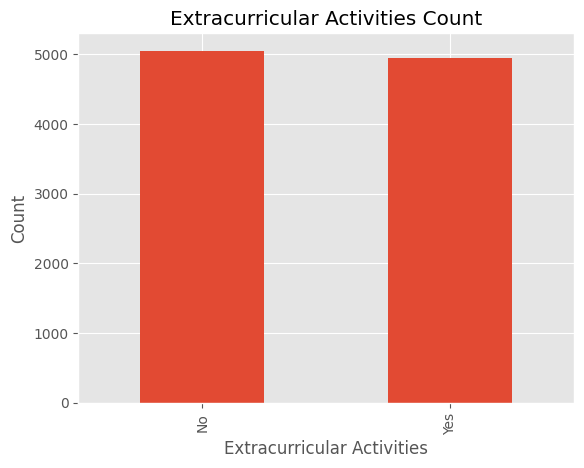

In [ ]:
# Barplot showing the count of the categorical data
ax = data['Extracurricular Activities'].value_counts().plot(kind='bar', title='Extracurricular Activities Count')
ax.set_xlabel('Extracurricular Activities')
ax.set_ylabel('Count')

In [ ]:
data['Sleep Hours'].value_counts()

8    1804
7    1676
6    1673
9    1622
4    1619
5    1606
Name: Sleep Hours, dtype: int64

<Axes: xlabel='Sleep Hours', ylabel='Count'>

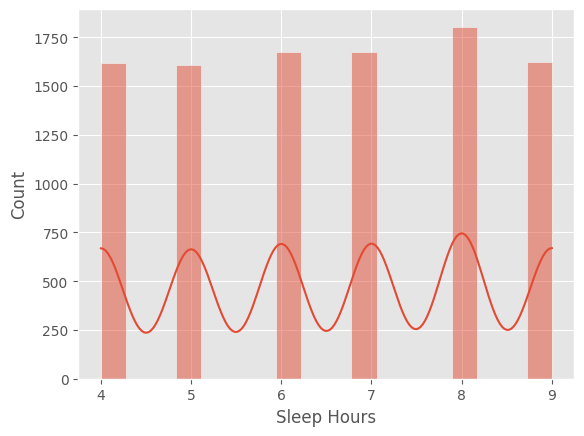

In [ ]:
# Histogram distribution plot showing the symentrical distribution of variables
sns.histplot(data["Sleep Hours"], kde=True)

In [ ]:
data['Hours Studied'].value_counts()

1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: Hours Studied, dtype: int64

<Axes: xlabel='Hours Studied', ylabel='Count'>

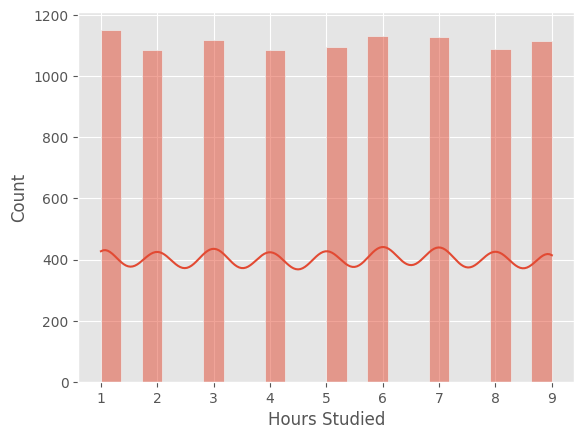

In [ ]:
sns.histplot(data["Hours Studied"], kde=True)

In [ ]:
data['Sample Question Papers Practiced'].value_counts()

6    1059
9    1051
3    1035
5    1028
8    1026
7     987
1     978
4     955
0     951
2     930
Name: Sample Question Papers Practiced, dtype: int64

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Count'>

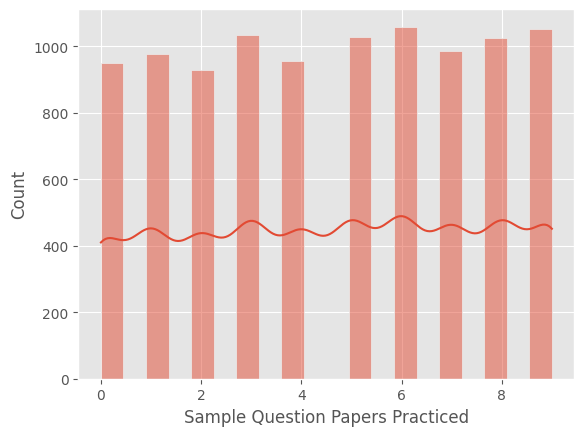

In [ ]:
sns.histplot(data["Sample Question Papers Practiced"], kde=True)

In [ ]:
# Correlation table use to determine the relationship between the target variable and feature variable
data.corr()

<ipython-input-20-1e4b4c4644d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<ipython-input-21-77f0ff77af12>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

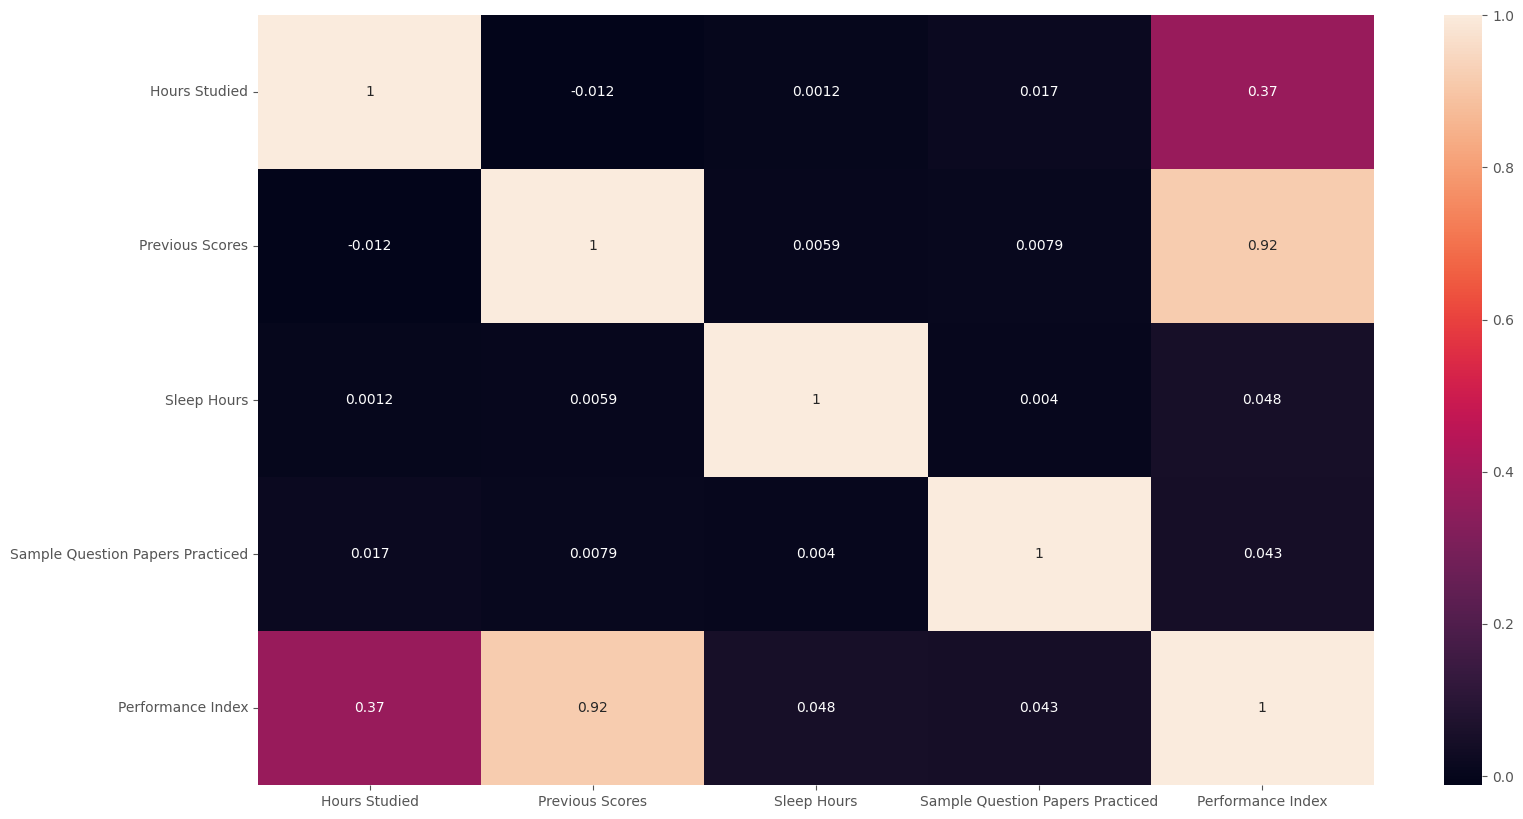

In [ ]:
# Heatplot showing the visual correlation of the dependent variable to our independet variable
plt.figure(figsize = (18, 10))
sns.heatmap(data.corr(), annot = True)

In [ ]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

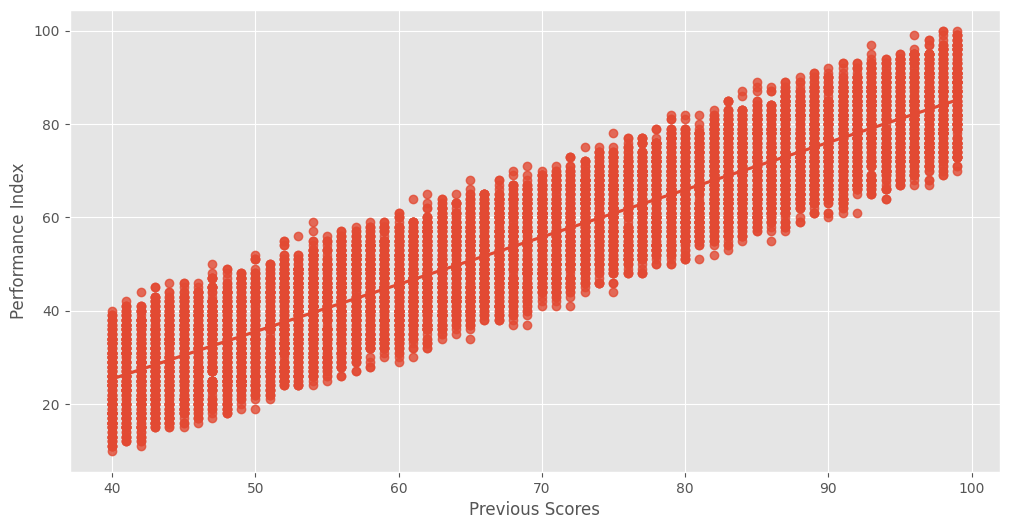

In [ ]:

# Regression plot(line of best fit) showing the linear relationship of the dependent variable to the independent variable
plt.figure(figsize=(12,6))
sns.regplot(x=data['Previous Scores'], y=data['Performance Index'])

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

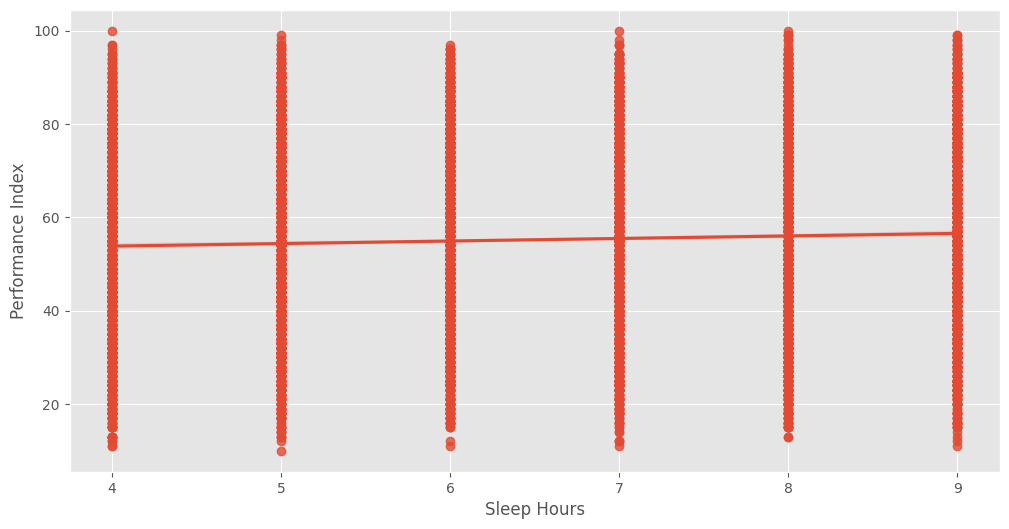

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x=data['Sleep Hours'], y=data['Performance Index'])

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

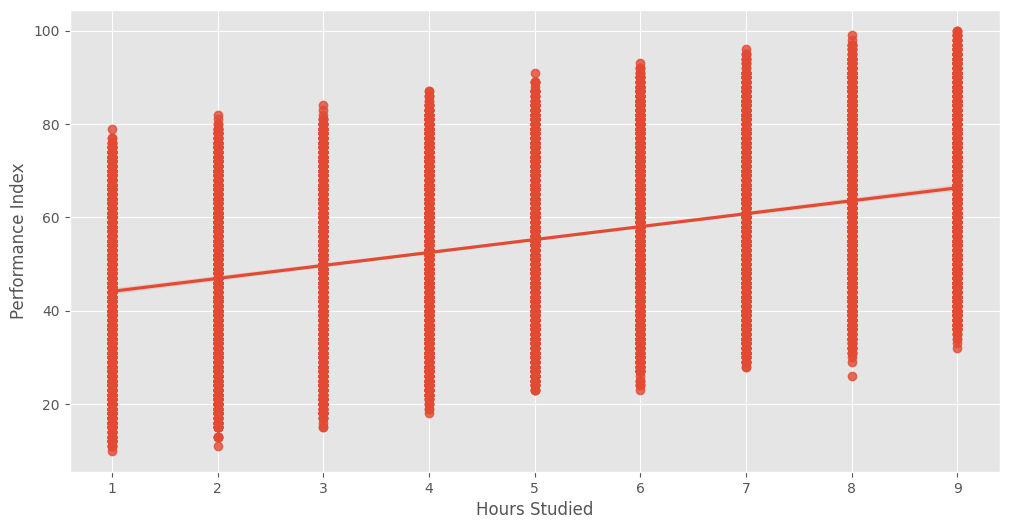

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x=data['Hours Studied'], y=data['Performance Index'])

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

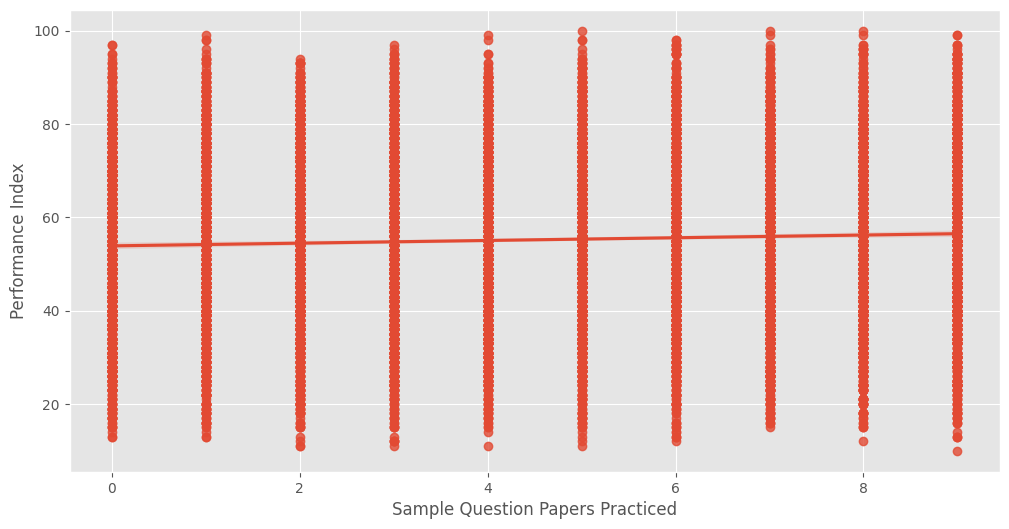

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x=data['Sample Question Papers Practiced'], y=data['Performance Index'])

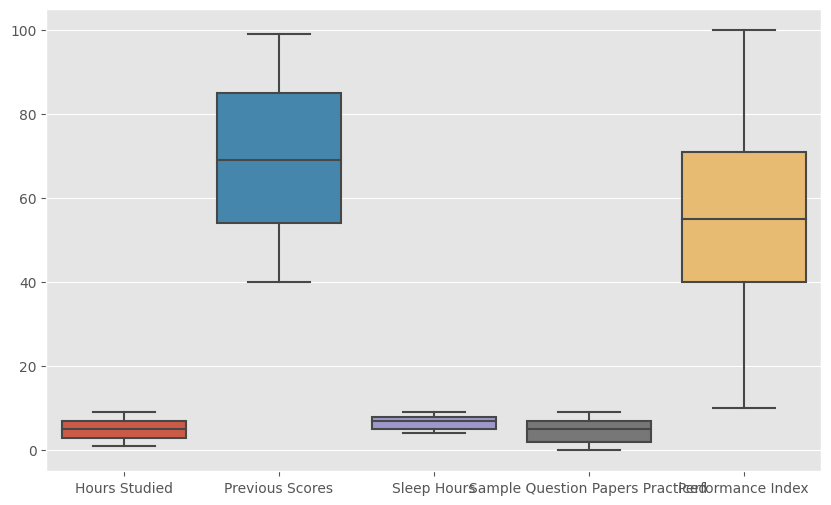

In [ ]:

#Box plot before scaling. For numeric data cleaning and testing. Showing if there is outliers in the data set, it also determines if the data set needs scailing or not.
plt.figure(figsize=(10,6))
sns.boxplot(data)
plt.show()

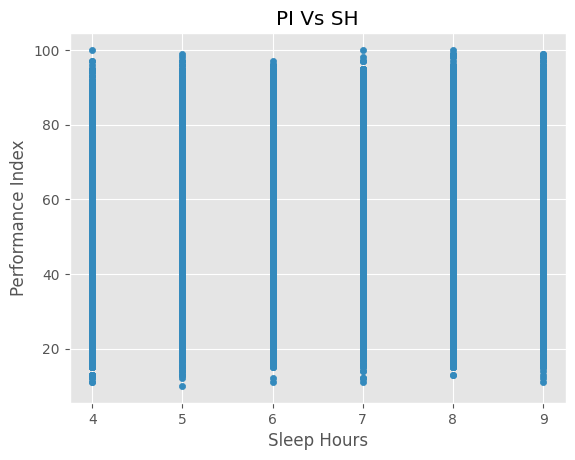

In [ ]:
data.plot(kind='scatter',
x='Sleep Hours', y='Performance Index', title='PI Vs SH')
plt.show()

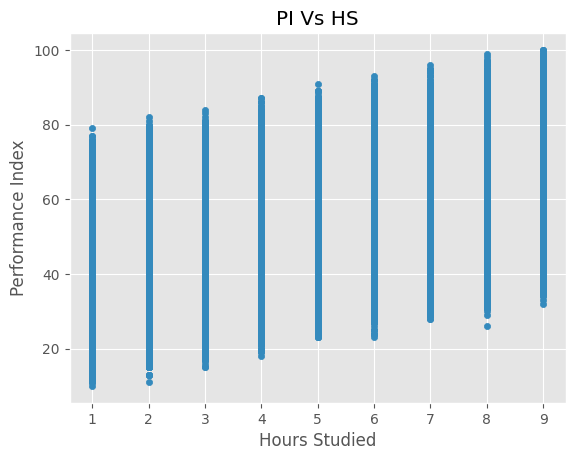

In [ ]:
data.plot(kind='scatter',
x='Hours Studied', y='Performance Index', title='PI Vs HS')
plt.show()

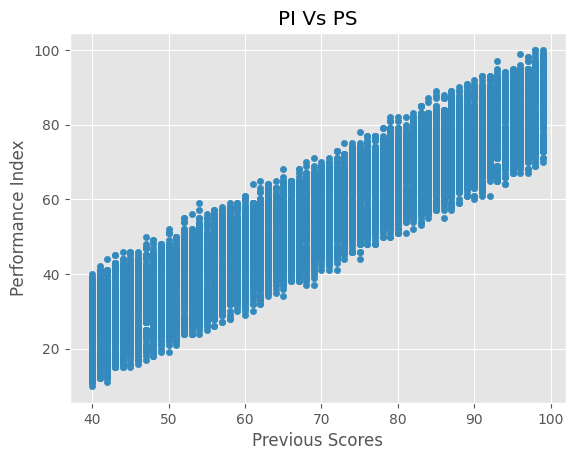

In [ ]:
data.plot(kind='scatter',
x='Previous Scores', y='Performance Index', title='PI Vs PS')
plt.show()

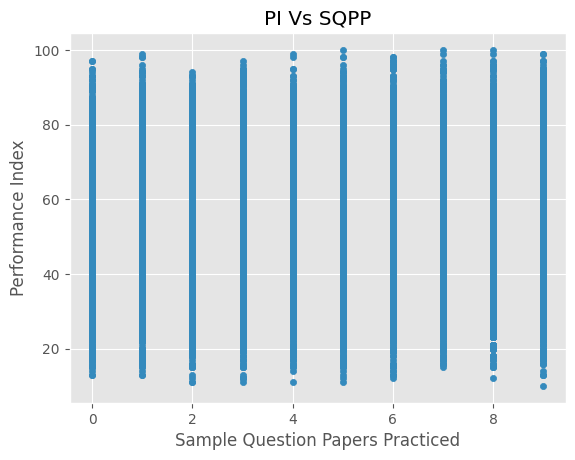

In [ ]:
data.plot(kind='scatter',
x='Sample Question Papers Practiced', y='Performance Index', title='PI Vs SQPP')
plt.show()

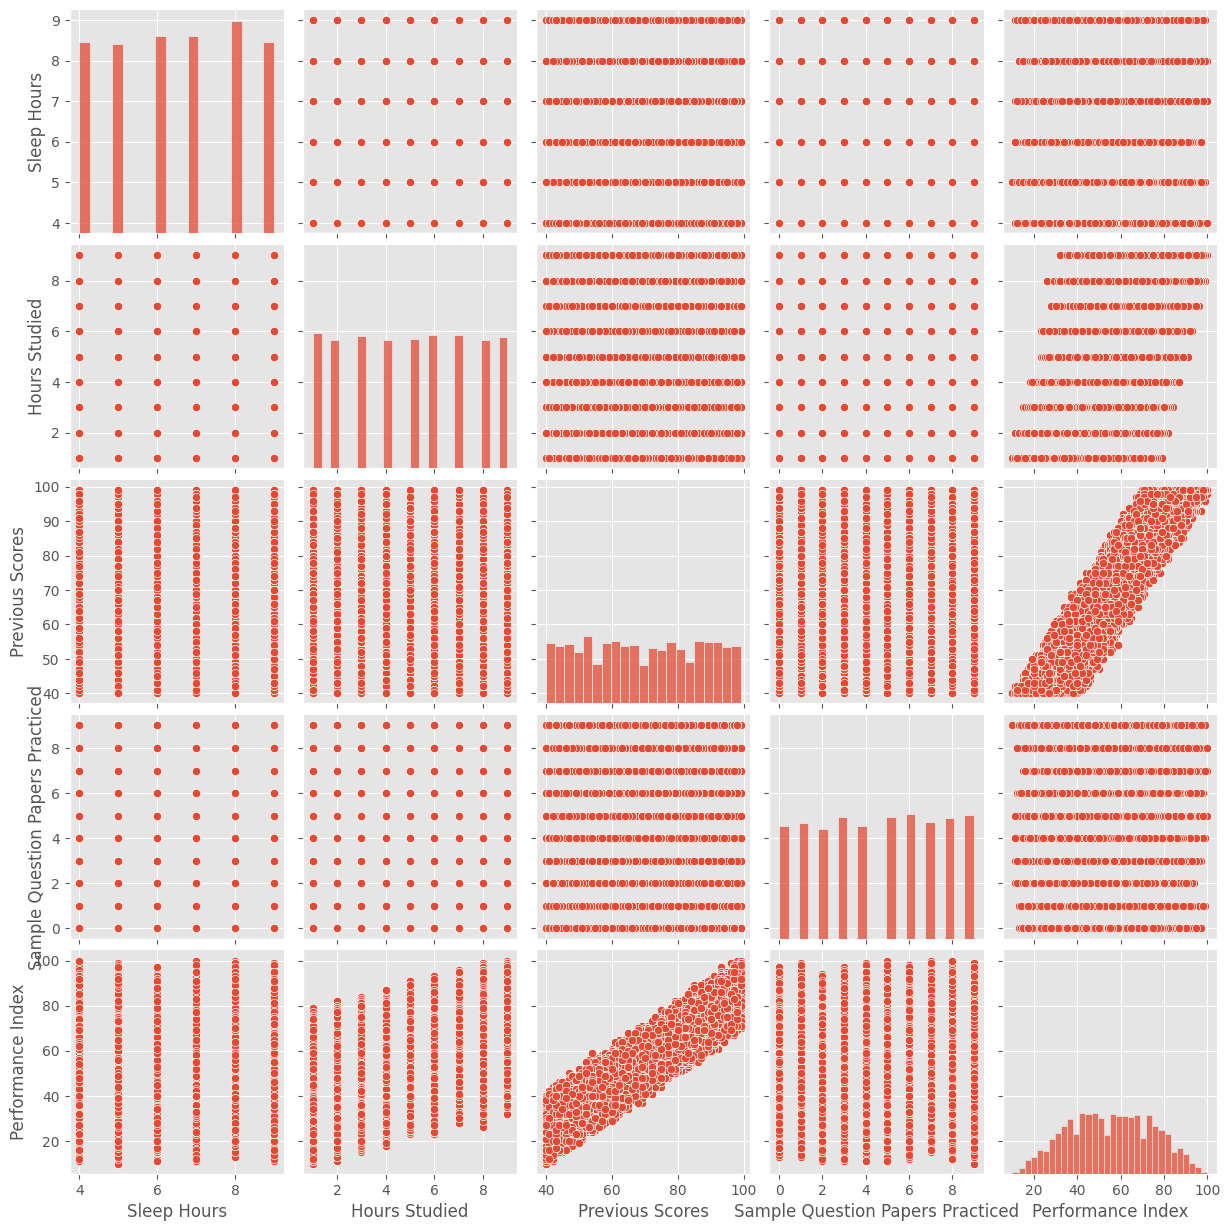

In [ ]:

# Pair plot showing side to side relationship of the variables.
sns.pairplot(data, vars=['Sleep Hours', 'Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced', 'Performance Index'])
plt.show()

In [ ]:
# Scaling numeric variables in the data set
scaler = StandardScaler()
df_num = scaler.fit_transform(data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])

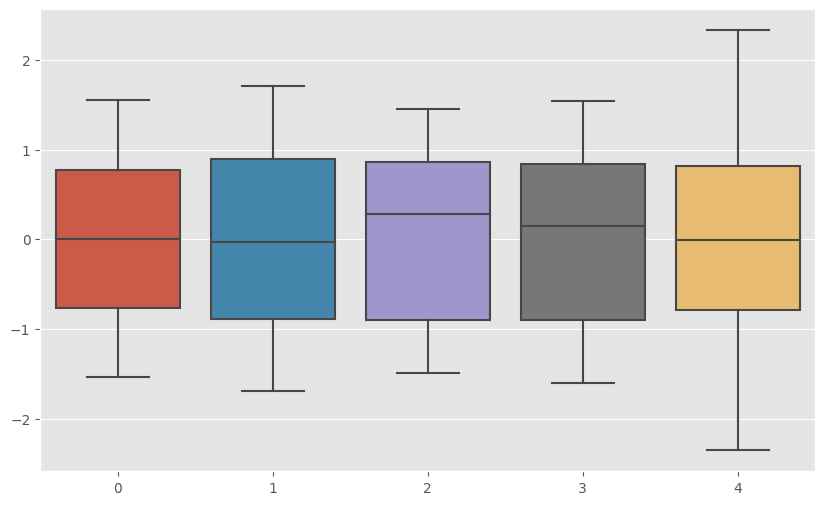

In [ ]:
#Box plot output after scaling. Shows that the data set needs scaling
plt.figure(figsize=(10,6))
sns.boxplot(df_num)
plt.show()

# **FEATURE SELECTION**

In [ ]:
# Label and features selection
x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [ ]:
x

array([[7, 99, 'Yes', 9, 1],
       [4, 82, 'No', 4, 2],
       [8, 51, 'Yes', 7, 2],
       ...,
       [6, 83, 'Yes', 8, 5],
       [9, 97, 'Yes', 7, 0],
       [7, 74, 'No', 8, 1]], dtype=object)

In [ ]:
y

array([91., 65., 45., ..., 74., 95., 64.])

# **FEATURE ENGINEERING**

In [ ]:

#Encoding categorical data#
from math import remainder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
column_t = ColumnTransformer([("encoder", OneHotEncoder(),[2])],
remainder = "passthrough")
x = np.array(column_t.fit_transform(x), dtype = np.float)

<ipython-input-41-788b47485ef6>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.array(column_t.fit_transform(x), dtype = np.float)


In [ ]:
# Avoiding Dummy Variable Trap
x = x[:, 1:]

In [ ]:
x

array([[ 1.,  7., 99.,  9.,  1.],
       [ 0.,  4., 82.,  4.,  2.],
       [ 1.,  8., 51.,  7.,  2.],
       ...,
       [ 1.,  6., 83.,  8.,  5.],
       [ 1.,  9., 97.,  7.,  0.],
       [ 0.,  7., 74.,  8.,  1.]])

In [ ]:
from sklearn.model_selection import train_test_split
#spliting data into train set and test set where 80 will go for training set and 20 for testing set#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#shape of the splitted data
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", y_train.shape)
print("Y_test:", y_test.shape)

X_train: (8000, 5)
X_test: (2000, 5)
Y_train: (8000,)
Y_test: (2000,)


In [ ]:
# scaling the data #
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_test

array([[-1.00075028, -0.37438098, -0.1367825 ,  1.45088919, -0.5545143 ],
       [-1.00075028,  1.17025433, -0.53796724, -1.49627552,  0.84038057],
       [-1.00075028,  0.39793667,  1.18139592, -0.90684258,  0.49165685],
       ...,
       [ 0.99925028, -1.14669864,  0.9521475 ,  0.2720233 ,  0.84038057],
       [-1.00075028, -0.37438098, -1.51227304,  0.86145625,  0.14293313],
       [-1.00075028, -0.76053981, -1.62689725, -0.90684258, -1.25196174]])

# **MODEL BUILDING AND EVALUATION**

In [ ]:
# fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#predict test result#
y_pred = linreg.predict(x_test)
y_pred

array([50.45128503, 53.09379171, 78.24502652, ..., 64.56863194,
       25.89718776, 18.82598463])

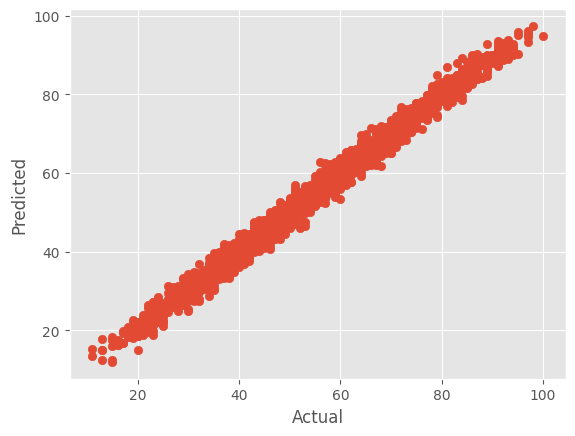

In [ ]:
# Scatter plot showing the predicted and the actual value
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

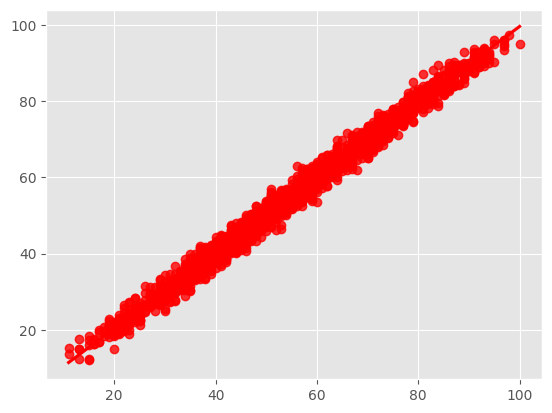

In [ ]:
#Regression plot of model#
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
#to know the different between the predicted value and actual value#
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [ ]:

# Outputing the test and the train result
output = pd.DataFrame({'actual value':y_test,'predicted value':y_pred})
output.head()

,actual value,predicted value
0,53.0,50.451285
1,50.0,53.093792
2,80.0,78.245027
3,24.0,25.391788
4,64.0,67.400668


In [ ]:
# model evaluation
from tabulate import tabulate
from sklearn.metrics import r2_score
actual_values = [53.0, 50.0, 80.0, 24.0, 64.0]
predicted_values = [50.451285, 53.093792, 78.245027, 25.391788, 67.400668]

# Calculate evaluation metrics
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r_squared = r2_score(actual_values, predicted_values)*100
# Print the summary table
print(table_string)

+----+--------------------------------+----------+
|    | Evaluation Metric              |    Value |
+====+================================+==========+
|  0 | Mean Squared Error (MSE)       |  6.52981 |
+----+--------------------------------+----------+
|  1 | Root Mean Squared Error (RMSE) |  2.55535 |
+----+--------------------------------+----------+
|  2 | R-squared (R2)                 | 98.0713  |
+----+--------------------------------+----------+


In [ ]:
my = ['python', 'hub']
for m in my:
    my.append(m.upper())
Print(my)